# Recurrent Neural Network (RNN)

### Reminder notes

In [61]:
# RNN : is a NN for sequencial datas.
  #  Contains internal recurrent loop which post-process data (sommation with new input data)

# RNN vs normal classification FF model : is that the order of each word in sequence matter!

# ex : fibonacci serie : the previous number of the serie remains useful after creating the next value 
# same thing with RNN each

# Applications : 
 # Audio analysis
 # Text generation  
 # Handwriting recognition 
 
# pros : great to predict word from the same family like :  Irland(country) = > Irish (language) 
# cons : Can't predict the word that are not from the same family : Irland => Galcelic ?? => # To solve this, we use a LSMT


### Implementation

create text generator from an irish lyrics just like when looking for good translation in : **Glosbe, DeepL**

In [62]:
import tensorflow as tf
 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [63]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-03-18 21:55:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-03-18 21:55:05 (129 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [64]:
# show file content
# !cat /tmp/irish-lyrics-eof.txt

collecting data

In [65]:
# create token object
tokenizer = Tokenizer()
# reading input data
data = open('/tmp/irish-lyrics-eof.txt').read()
# formating the data to : lower letter line no "\n" character
corpus = data.lower().split("\n")
# turn the words to numeric tokens
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

preprocessing

In [66]:
# preparing input sequences 
input_sequences = []
#  creating a sequence of number based on each corpus line
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
    # Applying Skip-Gram : skipping consecutive words 
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
  
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = (input_sequences[:,:-1] , input_sequences[:,-1])
# creating categorical class labels using one hot encoding
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# print(xs)
# print(labels)
# print(ys)

In [67]:
# checking index value based on corpus words
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [68]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [69]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [70]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [71]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

Model

In [72]:
# linear model
model = Sequential()
# word2vec
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
# add LSTM bidirectional cell state memory layer
model.add(Bidirectional(LSTM(150)))
# output layer
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


In [73]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_3 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


Train

In [74]:
history = model.fit(xs, ys, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
602/602 [==============================] - 8s 9ms/step - loss: 6.9333 - accuracy: 0.0609
Epoch 2/20
602/602 [==============================] - 5s 9ms/step - loss: 6.2246 - accuracy: 0.0724
Epoch 3/20
602/602 [==============================] - 6s 9ms/step - loss: 5.9386 - accuracy: 0.0806
Epoch 4/20
602/602 [==============================] - 6s 9ms/step - loss: 5.6387 - accuracy: 0.0952
Epoch 5/20
602/602 [==============================] - 6s 10ms/step - loss: 5.2289 - accuracy: 0.1091
Epoch 6/20
602/602 [==============================] - 6s 10ms/step - loss: 4.7219 - accuracy: 0.1411
Epoch 7/20
602/602 [==============================] - 6s 10ms/step - loss: 4.3264 - accuracy: 0.1720
Epoch 8/20
602/602 [==============================] - 6s 10ms/step - loss: 3.8721 - accuracy: 0.2275
Epoch 9/20
602/602 [==============================] - 6s 10ms/step - loss: 3.4412 - accuracy: 0.2986
Epoch 10/20
602/602 [==============================] - 6s 9ms/step - loss: 3.0570 - accuracy: 0

In [75]:
# plot
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

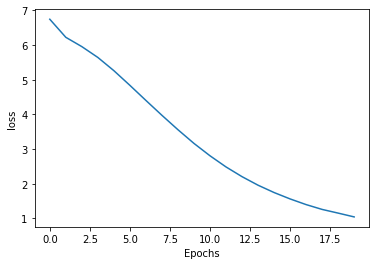

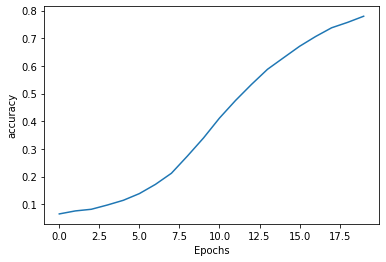

In [76]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')


Prediction

In [79]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# predicted = model.predict_classes(token_list, verbose=0)
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this moment and sleeping an ringing and ground in dungannon now a tie light a man hello to play a new bride i lovd best again easy on the sea are green and the young young turning grey seen by our fathers green i rest your rest sea a ground beaming more red trace trace again love again more day she said she said she had a spire from here from growin on the bridge of toome today easy so dead and stand and stainless easy as the sea are green and the covers buttoned down the sea is the law


In [80]:
# show generated text
print(seed_text)

I've got a bad feeling about this moment and sleeping an ringing and ground in dungannon now a tie light a man hello to play a new bride i lovd best again easy on the sea are green and the young young turning grey seen by our fathers green i rest your rest sea a ground beaming more red trace trace again love again more day she said she said she had a spire from here from growin on the bridge of toome today easy so dead and stand and stainless easy as the sea are green and the covers buttoned down the sea is the law


References

RNN libraries on KERAS : 
https://keras.io/api/layers/recurrent_layers/
 
 
Research essay : 
https://colah.github.io/posts/2015-08-Understanding-LSTMs/

Training  : 
https://www.youtube.com/watch?v=qjrad0V0uJE&t=65s

https://www.youtube.com/watch?v=ZMudJXhsUpY&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=6


